# python编程导论

John V. Guttag著，中国工信出版集团 人民邮电出版社，2018年2月第一版

基于python3讲计算机科学基础知识

## 1. 寻找最大奇数

### 1.1 计算三个数中最大的奇数

思路：  

每个数，先根据是否偶数判断是放弃还是留着比较大小。  
所以是2*2*2种可能。写起来比较繁杂，过程中也容易乱，一个不小心就忘了比较到哪里了。  
如果有超过3个数字进行比较，时间复杂度会以2的指数级增长。  

In [3]:
def max_odd(x,y,z):
    if x%2==0:
        if y%2==0:
            if z%2==0:
                print('No odd.')
                return None
            else:
                return z
        elif y%2!=0 and z%2==0:
            return y
        else:
            if y>= z:
                return y
            else:
                return z
    else:
        if y%2==0 and z%2==0:
            return x
        elif y%2==0 and z%2!=0:
            if x>=z:
                return x
            else:
                return z
        elif y%2!=0 and z%2==0:
            if x>=y:
                return x
            else:
                return y
        else:
            if x<=y and y<z:
                return z
            elif x<=y and y>=z:
                return y
            elif x>y and y>=z:
                return x
            elif x>y and y<z:
                if x>=z:
                    return x
                else:
                    return z

In [4]:
max_odd(43,45,43)

45

### 1.2 计算n个数中最大的奇数

前面这个计算3个数中最大的奇数，代码太长。

思路：  

    原比较数列用数组来存储。  
    for循环算出是否奇偶之后，奇数仍然存数组。  
    最后用max求最大值即可。
    
比较大小使用了max来简化过程。

In [2]:
def max_odd(list1):
    list2 = []
    for i in range(len(list1)):
        if list1[i] % 2 == 1:
            list2.append(list1[i])
    return max(list2)
list1 = [5,83,21]
max_odd(list1)

83

思路：  

增加了例外处理：  

    如果全为偶数的处理情况

In [6]:
def odd_max(num_list):
    odd_list = []
    for i in range(len(num_list)):
        if num_list[i]%2!=0:
            odd_list.append(num_list[i])
    if odd_list == []:
        print('No odd.')
    else:
        return max(odd_list)

In [7]:
num_list = [34,22,12,43,43,96,10,57,119,93]
odd_max(num_list)

119

哈哈哈！这回只有9行。感觉是真的会写程序了。

## 2. 输出指定数量的某字符

思路：  

    打印字符串本身比较简单。  
    只是增加了约束条件：约束打印字符的类型必须是数字或字母，约束重复数量必须是正整数。

In [3]:
def x_num(num,s):
    to_print = s * num
    print(to_print)

while True:
    '''
    如果用户输入的字符不是字母或数字，则需要重新输入。
    '''
    s = input('Which letter should I print? ')
    if s.isalnum():
        break    
    
while True:
    '''
    如果用户输入的数字不是正整数，则需要重新输入。
    '''
    n = input('How many times should I print the letter %s ? ' %s)
    if n.isdecimal() and int(n)>0:
        n = int(n)
        break
x_num(n,s)

Which letter should I print? r
How many times should I print the letter r ? 12
rrrrrrrrrrrr


思路：  

    如果用正则来表达约束，必定简单许多。 
    记住`re.match`的语法即可，第一个参数是正则表达式，第二个参数是待匹配字符串

In [54]:
import re
def x_num(num, s):
    if re.match(r'^\d+$', str(num)) and re.search(r'\S', s) and num!=0:
        print(s*num)
    else:
        print('参数有误，无法打印！')

In [55]:
x_num(0, ' ^_^ ')

参数有误，无法打印！


## 3.  整数根

### 3.1 计算完全立方数

In [8]:
def cube_root(x):
    c = 0
    while c**3<abs(x):
        c += 1
    if c**3!=abs(x):
        print('%d is not cube number.' %x)
    else:
        if x<0:
            c = -c
        print('Cube root of %d is %d' %(x,c))

In [9]:
cube_root(1957816251)

Cube root of 1957816251 is 1251


In [56]:
def is_CubeRoot(x):
    c = 0
    while c**3<abs(x):
        c += 1
    if c ** 3 != abs(x):
        return False
    else:
        if x < 0:
            c = -c
        print('Cube root of %d is %d' %(x,c))
        return True

In [63]:
for i in range(1000):
    is_CubeRoot(i)

Cube root of 0 is 0
Cube root of 1 is 1
Cube root of 8 is 2
Cube root of 27 is 3
Cube root of 64 is 4
Cube root of 125 is 5
Cube root of 216 is 6
Cube root of 343 is 7
Cube root of 512 is 8
Cube root of 729 is 9


###  3.2 某整数是否有根

In [11]:
def num_root(x):
    root_list = []
    for i in range(x):
        root = 1        
        while root<x:
            if root**i!=x: 
                root += 1
            else:
                root_list.append(root)
                print('%d ** %d is %d'%(root, i, x))
                break 
    if root_list == []:
        print('No root for %d' %x)

In [14]:
num_root(27**2)

27 ** 2 is 729
9 ** 3 is 729
3 ** 6 is 729


## 4. 逗号隔开的数值字符串求和

In [12]:
def num_sum(s):
    num_list = []
    i = 0
    while i <= len(s):
        if ',' in s:
            if s[i]!=',':
                i = i + 1
            else:
                num_list.append(float(s[0:i]))
                s = (s.replace((s[0:i]),'')).strip(',')
                i = 0
                continue
        else:
            num_list.append(float(s))
            break
    return sum(num_list)

In [13]:
num_sum('1.23,2.4,3.123,4.34,5.32,6.21')

22.623

改进，使用列表推导式。

In [19]:
def strNum(s):
    sList = [float(num) for num in s.split(',')]
    return sum(sList)
strNum('1.23,2.4,3.123,4.34,5.32,6.21')

22.623

## 5. 求平方根

### 5.1 穷举法

In [14]:
def sqr_root(x):
    epsilon = 0.001 
    c = 0
    i = 0
    while abs(c**2-x)>epsilon and c<x:
        c = c + epsilon**2
        i += 1
    print(i)
    return c

In [15]:
sqr_root(12)

3463958


3.4639580001302805

### 5.2 二分法

In [16]:
def sqr_root_bisec(x):
    epsilon = 0.001 
    low = 0
    high = x
    c = (low+high)/2
    i = 0
    while abs(c**2-x)>epsilon:
        if c**2<=x:
            low = c
            i += 1
        else:
            high = c
            i += 1
        c = (low+high)/2
    print(i)
    return c
sqr_root_bisec(123456)

34


351.36306126974523

### 5.3 牛顿法

In [17]:
def sqr_root_newton(x):
    epsilon = 0.001
    guess = x/2  #这里不除以2的话，会多一次次数
    i = 0
    while abs(guess**2-x)>epsilon:
        guess = guess - (guess**2-x)/(2*guess)
        i += 1
    print(i)
    return guess
sqr_root_newton(123456)

11


351.3630601485824

没想到牛顿的方法比二分法还快！！！

### 5.4  也说是牛顿法

以下方法的原理（[计算平方根的算法 - Mr.Rico - 博客园](https://www.cnblogs.com/xkfz007/archive/2012/05/15/2502348.html)）

牛顿法：  

这个非形式化过程可以用如下更形式化的自然语言表示：

1. 为了计算数x的平方根，从选择一个任意的猜测值g开始。一种可能就是将g设为x，尽管也可以选择任何其他的正数值。  
2. 如果猜测值g足够接近于正确的平方根，算法结束，函数将g作为结果返回。  
3. 如果g不够精确，用g和x/g的平均值作为新的猜测值。因为这两个值中的一个小于确切的平方根，另一个则大于确切的平方根，选择平均值会使你得到一个更接近于正确答案的值。  
4. 把新的猜测值存入变量g，从第二步开始重复这个过程。  

其实不用随机函数也是一样，或者取值x，或者取值x/2

In [35]:
# import random 
def square_root(x):
    # g = random.randint(1, x)
    g = x / 2
    i = 0
    while True:
        if abs(g*g-x) < 0.001:
            i += 1
            print(i)
            return g
            break
        else:
            g = (g+x/g)/2
            i += 1     

square_root(123456)

12


351.36306014858235

## 6. 浮点数

In [37]:
x = 0.0
for i in range(10):
    x = x + 0.1
print(x)

0.9999999999999999


## 7. 判断是否包含

In [19]:
def isIn(subS, s):
    if subS in s:
        return True
    else:
        return False
isIn('et', 'wetrt')

True

## 8. 阶乘

In [39]:
def factI(n):
    y = 1
    while n>1:
        y = y * n
        n = n -1
    return y
factI(10)

3628800

In [38]:
def factR(n):
    if n == 1:
        return n
    else:
        return factR(n-1)*n
factR(10)

3628800

## 9. 斐波那契数列

为什么必提呢？
[斐波那契数列为什么那么重要，所有关于数学的书几乎都会提到？ - 知乎](https://www.zhihu.com/question/28062458)

> 斐波那契数列是编程书中讲递归必提的，因为它是按照递归定义的。

### 9.1 普通递归方法计算

In [40]:
def fab(x):
    global numFibCalls
    numFibCalls += 1
    if x==0 or x==1:
        return 1
    else:
        return fab(x-1)+fab(x-2)
for i in range(10):
    global numFibCalls
    numFibCalls = 0
    print(fab(i), end=' ')
    print(numFibCalls)

1 1
1 1
2 3
3 5
5 9
8 15
13 25
21 41
34 67
55 109


### 9.2 快速方法（动态规划法）计算：  

也用上面的全局变量计算调用次数，每次都是1。复杂度为O(n)

**将第一次调用结果保存下来，下次需要时直接查找，而不是重新计算。这种方法称为备忘录法，是动态规划的核心思想。**

In [40]:
def fab(x, memo = {}):
    if x==0 or x==1:
        return 1
    try:
        return memo[x]
    except KeyError:
        result = fab(x-1, memo) + fab(x-2,memo)
        memo[x] = result
        return result
for i in range(20):
    print(fab(i), end=' ')

1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 

memo完全可以不放在参数里。

In [5]:
def fab(x):
    memo = {}
    if x==0 or x==1:
        return 1
    try:
        return memo[x]
    except KeyError:
        result = fab(x-1) + fab(x-2)
        memo[x] = result
        return result
for i in range(20):
    print(fab(i), end=' ')

1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 

In [44]:
import pprint
pprint.pprint([fab(i)/fab(i+1) for i in range(21)])

[1.0,
 0.5,
 0.6666666666666666,
 0.6,
 0.625,
 0.6153846153846154,
 0.6190476190476191,
 0.6176470588235294,
 0.6181818181818182,
 0.6179775280898876,
 0.6180555555555556,
 0.6180257510729614,
 0.6180371352785146,
 0.6180327868852459,
 0.6180344478216818,
 0.6180338134001252,
 0.6180340557275542,
 0.6180339631667066,
 0.6180339985218034,
 0.618033985017358,
 0.6180339901755971]


## 10. 检测回文

In [23]:
def isPalExist(s):
    def toChars(s):
        s1 = s.lower()
        return s1
    def isPal(s):
        '''
        if len(s)<=1 or (len(s)==2 and s[0]==s[-1]):
            return True
        else:
            if s[0]==s[-1]:
                isPal(s[1:-1])
            else:
                return False
        '''
        if len(s)<=1:
            return True
        else:
            return s[0]==s[-1] and isPal(s[1:-1])        
    return isPal(toChars(s))

In [24]:
isPalExist('Goddog')

True

## 13. 函数作参数

In [6]:
def applyToEach(L,f):
    for i in range(len(L)):
        L[i] = f(L[i])
        print(L[i])
        
L = [1,5,6]
applyToEach(L,fab)

1
8
13


In [26]:
L1 = [3, 28, 36]
L2 = [2, 15, 92]
for i in map(min,L1,L2):
    print(i)

2
15
36


[Python map() 函数 | 菜鸟教程](https://www.runoob.com/python/python-func-map.html)

map函数：  
第一个参数是函数，后面的参数是数列。python3的结果是生成器。

In [13]:
import math
for i in map(math.pow, [1,2,3,4,5], [2,2,2,2,2]):
    print(i)

1.0
4.0
9.0
16.0
25.0


In [27]:
L = []
for i in map(lambda x, y: x**y, [1,2,3,4],[1,2,3,4]):
    print(i)

1
4
27
256


## 14. 处理异常

### 14.1 不除以零

In [15]:
def divise_noZero(num, fact):
    try:
        division = num / fact
        print(division)
        return division
    except ZeroDivisionError:
        print('Fact should not be Zero.')
num = int(input('Input a number as a dividend: '))
fact = int(input('Input a number as a divisor: '))
divise_noZero(num, fact)

Input a number as a dividend: 8
Input a number as a divisor: 0
Fact should not be Zero.


### 14.2 字符串中的数值求和

In [18]:
def sumDigits(s):
    num = []
    for i in s:
        if i in '0123456789':
            num.append(int(i))
    if num == []:
        print('There is no digit in this string.')
    return sum(num)

In [19]:
sumDigits('abeeettued')

There is no digit in this string.


0

### 14.3 限定输入整数

In [32]:
def readInt():
    while True:
        val = input('Enter an integer:')
        try:
            return int(val)
        except (ValueError,TypeError):
            print('%s is not an interger.' %val)
readInt()

Enter an integer:4rt
4rt is not an interger.
Enter an integer:456


456

### 14.4 找第一个偶数（输入数值串）

In [37]:
def findAnEven(L):
    result = ''
    for i in L:
        if int(i)%2==0:
            return i
            break
        else:
            result += i
    # if result != '':
    return ValueError
L = '7797'
findAnEven(L)

ValueError

为什么跳出循环后，用result是否空来判定任务是否失败呢？  

照理result肯定不空的，除非第一个字符就是偶数。

事实证明去掉这个result是否空的条件也是一样的。只要循环结束还没有返回，那就指定是没有找到偶数的。

### 14.5 找第一个偶数（输入数值字母或其他字符串）

In [41]:
def findEvenNoAlpha(L):
    result = ''
    for i in L:
        try:
            if int(i)%2==0:
                print('The first even number %s is found.' %i)
                return i
                break
            else:
                result += i
                print('%s is an odd number, not even.' %i)
        except ValueError as msg:
            result += i
            print(msg)
    # if result != '':
    return ValueError

In [42]:
L = '35re-ty7'
findEvenNoAlpha(L)

3 is an odd number, not even.
5 is an odd number, not even.
invalid literal for int() with base 10: 'r'
invalid literal for int() with base 10: 'e'
invalid literal for int() with base 10: '-'
invalid literal for int() with base 10: 't'
invalid literal for int() with base 10: 'y'
7 is an odd number, not even.


ValueError

### 14.6 打开文件异常

In [46]:
import os
def getGrades(fname):
    try:
        gradesFile = open(os.path.join(os.path.dirname(os.getcwd()), 'files', fname), 'r')
    except IOError:
        raise ValueError('The program "getGrades" could not open ' + fname)
    grades = []
    for line in gradesFile:
        try:
            grades.append(float(line))
        except:
            raise ValueError('Unable to convert line to float')
    return grades

def calculate(fname):
    try:
        grades = getGrades(fname)
        grades.sort()
        median = grades[len(grades)//2]
        average = sum(grades)/len(grades)
        maxGrade = max(grades)
        minGrade = min(grades)
        print('Median grade is ', median)
        print('Average grade is ', average)
        print('Max grade is ', maxGrade)
        print('Min grade is ', minGrade)
    except ValueError as errorMsg:
        print('Whoops. ', errorMsg)

calculate('quiz1grades.txt')

Median grade is  74.0
Average grade is  70.06666666666666
Max grade is  92.0
Min grade is  34.0


## 15. 开始class类

原来class类，就是自己定义自己的类型。函数是自己定义自己的函数。系统指定类型就是整数类、字符串类等这些。每个类型都有自己不同的方法。例如整数可相减而字符串却不可以。所以class就是让用户自己定义某种包含某些特定方法的类型。类型定义好了之后，给它赋值就是实例化了。

class 后面的参数实际上是父类。

### 15.1 整数类Intset

In [47]:
class IntSet(object):
   
    # 实例化后首先做这个操作。
    def __init__(self):
        self.vals = []
    
    # 新增元素
    def insert(self,e):
        if e not in self.vals:
            self.vals.append(e)
        else:
            raise ValueError(str(e) + ' is in this set.')
    
    # 检查是否包含该元素
    def member(self,e):
        return e in self.vals
    
    # 删除元素
    def remove(self,e):
        try:
            self.vals.remove(e)
        except:
            # 不存在的元素无法删除
            raise ValueError('Not found ' + str(e))
            
    # 获得元素集合
    def getmember(self):
        return self.vals[:]
    
    # 打印全体
    def __str__(self):
        self.vals.sort()
        result = ''
        for e in self.vals:
            result = result + str(e) + ','
        return '{' + result[:-1] + '}'

In [48]:
c = IntSet()
f = [5,6,7,3,8,0,12,34]
for e in f:
    c.insert(e)

In [50]:
c.insert(18)

In [51]:
c.getmember()

[5, 6, 7, 3, 8, 0, 12, 34, 18]

In [52]:
c.remove(6)

In [53]:
c.getmember()

[5, 7, 3, 8, 0, 12, 34, 18]

In [54]:
c.member(6)

False

In [55]:
print(c)

{0,3,5,7,8,12,18,34}


In [98]:
help(int)

Help on class int in module builtins:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __ceil__(...)
 |      Ceiling of

### 15.2 人类Person

[Python rindex()方法 | 菜鸟教程](http://www.runoob.com/python/att-string-rindex.html)

rindex，参数是想要查找的字符串，返回是该字符串的位置，从右边数第一次。

相对于index而言。index返回的也是字符串的位置，但是从左边数第一次。

In [56]:
import datetime

class Person(object):
    
    def __init__(self,name):
        # init里规定对象的属性。对于这个person来说，就是name，lastname，birthday
        self.name = name
        try:
            lastBlank = name.rindex(" ")
            self.lastName = name[lastBlank+1:]
        except:
            self.lastName = name
        self.birthday = None
    
    # 除了init之外，规定对象的方法
    def getName(self):
        return self.name
    
    def getLastName(self):
        return self.lastName
    
    def setBirthdate(self, birthdate):
        self.birthday = birthdate
        
    def getAge(self):
        try:
            return ((datetime.date.today() - self.birthday).days)/365
        except:
            raise ValueError('Birthday is not set.')
            
    def __lt__(self, other):
        if self.lastName == other.lastName:
            return self.name<other.name
        return self.lastName<other.lastName
        
    def __str__(self):
        return self.name

In [57]:
me = Person('Cindy Cai')
him = Person('Barack Hussein Obama')
her = Person('Michral Guttage')
plist = [me, him, her]

In [58]:
for p in plist:
    print(p)

Cindy Cai
Barack Hussein Obama
Michral Guttage


In [59]:
me.setBirthdate(datetime.date(1981,8,27))

In [60]:
print(me)

Cindy Cai


In [61]:
me.getLastName()

'Cai'

In [62]:
me.getAge()

38.10958904109589

In [63]:
me < him

True

In [64]:
plist.sort()

In [65]:
for p in plist:
    print(p)

Cindy Cai
Michral Guttage
Barack Hussein Obama


In [67]:
him.setBirthdate(datetime.date(1979,10,23))

In [68]:
him.getAge()

39.95616438356164

In [74]:
class MITPerson(Person):
    nextIdnum = 0
    
    def __init__(self,name):
        Person.__init__(self,name)
        self.idNum = MITPerson.nextIdnum
        MITPerson.nextIdnum += 1
        
    def getIdnum(self):
        return self.idNum
    
    def isStudent(self):
        return isinstance(self, Student)
    
    def __lt__(self, other):
        return self.idNum<other.idNum

In [75]:
p1 = MITPerson('Barbara Beaver')
p2 = MITPerson('Clark Simpton')
p3 = MITPerson('Mark Guttag')
p4 = MITPerson('Billy Bob Beaver')
MITP = [p1, p2, p3, p4]
p2.setBirthdate(datetime.date(1981,8,27))
for p in MITP:
    print(p)
    print(p.getIdnum())

Barbara Beaver
0
Clark Simpton
1
Mark Guttag
2
Billy Bob Beaver
3


In [76]:
class Student(MITPerson):
    pass

class UG(Student):
    def __init__(self, name, classYear):
        MITPerson.__init__(self, name)
        self.year = classYear
        
    def getClass(self):
        return self.year
    
class Grad(Student):
    pass

In [7]:
p5 = Grad('Buzz Aldrin')
p6 = UG('Billy Clinton', 2003)
MITP.append(p5)
MITP.append(p6)
for p in MITP:
    print(p)
    print(type(p))

Barbara Beaver
<class '__main__.MITPerson'>
Clark Simpton
<class '__main__.MITPerson'>
Mark Guttag
<class '__main__.MITPerson'>
Billy Bob Beaver
<class '__main__.MITPerson'>
Buzz Aldrin
<class '__main__.Grad'>
Billy Clinton
<class '__main__.UG'>


In [8]:
print(p5, 'is a graduate student is ', type(p5)==Grad)
print(p5, 'is a graduate student is ', type(p5)==UG)

Buzz Aldrin is a graduate student is  True
Buzz Aldrin is a graduate student is  False


In [9]:
p5.isStudent()

True

In [10]:
p6.isStudent()

True

In [11]:
p3.isStudent()

False

In [8]:
class TransferStudent(Student):
    
    def __init__(self, name, fromSchool):
        MITPerson.__init__(self, name)
        self.fromSchool = fromSchool
        
    def getOldSchool(self,name):
        return self.fromSchool

In [9]:
p7 = TransferStudent('Felix Green', 'Havard')
MITP.append(p7)

新的类别：分数grades

In [69]:
class Grades(object):
    
    def __init__(self):
        self.students = []
        self.grades = {}
        self.isSorted = True
        
    def addStudent(self, student):
        if student in self.students:
            raise ValueError('Duplicated student.')
        self.students.append(student)
        self.grades[student.getIdnum()] = []
        self.isSorted = False
    
    def addGrade(self, student, grade):
        if student not in self.students:
            raise ValueError('Student not in mapping.')
        # append，列表，可以记录同一个学生的多门成绩
        self.grades[student.getIdnum()].append(grade)
        
    def getGrades(self, student):
        if student not in self.students:
            raise ValueError('Student not in mapping.')
        return self.grades[student.getIdnum()][:]
    
    def getStudents(self):
        if self.isSorted == False:
            self.students.sort()
            self.isSorted = True
        return self.students[:]

什么时候用if什么时候用try-except？

In [70]:
sixHundred = Grades()

In [77]:
ug1 = UG('Jane Doe', 2014)
ug2 = UG('John Simpton', 2015)
ug3 = UG('David Henry', 2003)
g1 = Grad('Billy Buckner')
g2 = Grad('Bucky F. Dent')

MITP.append(ug1)
MITP.append(ug2)
MITP.append(ug3)
MITP.append(g1)
MITP.append(g2)

In [78]:
for p in MITP:
    sixHundred.addStudent(p)

In [79]:
for s in sixHundred.getStudents():
    sixHundred.addGrade(s, 75)

In [80]:
sixHundred.getGrades(ug1)

[75]

In [81]:
sixHundred.addGrade(ug1, 80)
sixHundred.addGrade(ug2, 65)

In [82]:
sixHundred.getGrades(ug1)

[75, 80]

In [86]:
for s in sixHundred.getStudents():
    print(sixHundred.getGrades(s))

[75]
[75]
[75]
[75]
[75, 80]
[75, 65]
[75]
[75]
[75]


In [87]:
for s in sixHundred.getStudents():
    print(s)
    print(sixHundred.getGrades(s))

Barbara Beaver
[75]
Clark Simpton
[75]
Mark Guttag
[75]
Billy Bob Beaver
[75]
Jane Doe
[75, 80]
John Simpton
[75, 65]
David Henry
[75]
Billy Buckner
[75]
Bucky F. Dent
[75]


### 15.3 类方法的隐藏

附录：[【编程开发】Python隐藏属性 - 知乎](https://zhuanlan.zhihu.com/p/30553607)  （与本节无关）

In [89]:
class infoHiding(object):
    
    def __init__(self):
        self.visible = 'Look at me.'
        self.__alsoVisible__ = 'Look at me too.'
        self.__invisible = 'Don\'t look at me directly.'
        
    def printVisible(self):
        print(self.visible)
        
    def printInvisible(self):
        print(self.__inVisible)
        
    def __printInvisible(self):
        print(self.__inVisible)
        
    def __printInvisible__(self):
        print(self.__inVisible)

In [90]:
test = infoHiding()

三个属性的隐藏与否：

In [91]:
print(test.visible)

Look at me.


In [92]:
print(test.__alsoVisible__)

Look at me too.


In [93]:
print(test.__invisible)

AttributeError: 'infoHiding' object has no attribute '__invisible'

四个方法的隐藏与否：

In [94]:
test.printVisible()

Look at me.


In [95]:
test.printInvisible()

AttributeError: 'infoHiding' object has no attribute '_infoHiding__inVisible'

In [96]:
test.__printInvisible__()

AttributeError: 'infoHiding' object has no attribute '_infoHiding__inVisible'

In [97]:
test.__printInvisible()

AttributeError: 'infoHiding' object has no attribute '__printInvisible'

不太理解隐藏属性和方法，没找到关于这个的讲解。暂记视频：  

[(10) 马哥教育python视频 -- 48 Python类方法中的可用变量 - YouTube](https://www.youtube.com/watch?v=7d7xsJwGrgg)

喜欢莫烦讲的：  
[(10) python基础 18 class 类 (教学教程tutorial) - YouTube](https://www.youtube.com/watch?v=PI9U3LKNCo4)
[(10) python基础 19 类 init 功能 (教学教程tutorial) - YouTube](https://www.youtube.com/watch?v=GxMm82yy2Ds)

In [104]:
class Dog(object):
    def __init__(self, name):
        self.name = name
        print('Init Dog')
    def __str__(self):
        return self.name
    def __del(self):
        print('%s 被回收' %self.name)
        
dog1 = Dog('huang')
dog2 = Dog('Lan')
print(dog1)

Init Dog
Init Dog
huang


[07_python类和对象【北京尚学堂·百战程序员】-教育-高清完整正版视频在线观看-优酷](https://v.youku.com/v_show/id_XNDAwNDQ5ODY0MA==.html?spm=a2h0k.11417342.soresults.dtitle)

这个视频有助于我理解类和对象。

还有个new方法。
[python 类中__new__ 和 __init__方法区别 - 知乎](https://zhuanlan.zhihu.com/p/21379984)

### 15.4 抵押贷款

In [19]:
def findPayment(loan, r, m):
    return loan*(r*(1+r)**m)/((1+r)**m-1) #还款期限内每月所需固定支付金额，包括利息和本金。

class Mortgage(object):
    def __init__(self, loan, annRate, months):
        self.loan = loan
        self.rate = annRate/12
        self.months = months
        self.paid = [0.0]
        self.outstanding = [loan]
        self.payment = findPayment(loan, self.rate, months)
        self.legend = None
    
    def makePayment(self):
        self.paid.append(self.payment) #此为等额本息还款法
        reduction = self.payment - self.outstanding[-1]*self.rate #余额乘以利率即利息。支付款项中去掉利息即为本金减少的部分
        self.outstanding.append(self.outstanding[-1]-reduction) #余额减去本金减少的部分，为新的余额。
    
    def getTotalPaid(self):
        return sum(self.paid)
    
    def __str__(self):
        return self.legend

In [72]:
class Fixed(Mortgage):
    def __init__(self, loan, rate, months):
        Mortgage.__init__(self, loan, rate, months)
        self.legend = 'Fixed, ' + str(round(rate*100,2)) + '%'

In [73]:
class FixedWithPts(Mortgage):
    def __init__(self, loan, rate, months, pts):
        Mortgage.__init__(self, loan, rate, months)
        self.pts = pts
        self.paid = [loan*pts/100]
        self.legend = 'Fixed, ' + str(round(rate*100,2)) + '%, ' + str(pts) + 'points'

In [74]:
class TwoRate(Mortgage):
    def __init__(self, loan, rate, months, teaserRate, teaserMonths):
        Mortgage.__init__(self, loan, teaserRate, months)
        self.teaserMonths = teaserMonths
        self.teaserRate = teaserRate
        self.nextRate = rate/12
        self.legend = str(teaserRate*100) + '% for ' + str(self.teaserMonths) \
        + 'months, then ' + str(round(rate*100, 2)) + '%'
        
    def makePayment(self):
        Mortgage.makePayment(self)
        if len(self.paid) == self.teaserMonths + 1:
            self.rate = self.nextRate
            self.payment = findPayment(self.outstanding[-1], self.rate, self.months-self.teaserMonths)

In [39]:
def compareMortgage(amt, years, fixedRate, pts, ptsRate, varRate1, varRate2, varMonths):
    totMonths = years*12
    fixed1 = Fixed(amt, fixedRate, totMonths)
    fixed2 = FixedWithPts(amt, ptsRate, totMonths, pts)
    twoRate = TwoRate(amt, varRate2, totMonths, varRate1, varMonths)
    morts = [fixed1, fixed2, twoRate]
    for m in range(totMonths):
        for mort in morts:
            mort.makePayment()
    for m in morts:
        print(m)
        # print([round(i,2) for i in m.paid[:]]) # 用列表推导式打印出了每个月的还款期刊。
        print('Total payments = $' + str(int(m.getTotalPaid())))

In [40]:
compareMortgage(amt=650000, years = 20, fixedRate=0.07, pts = 3.25, ptsRate=0.05, \
                varRate1=0.045, varRate2=0.095, varMonths=48)

Fixed, 7.0%
Total payments = $1209466
Fixed, 5.0%, 3.25points
Total payments = $1050655
4.5% for 48months, then 9.5%
Total payments = $1292804


#### 15.4.2 增加绘图功能的进阶版

In [71]:
def findPayment(loan, r, m):
    return loan*(r*(1+r)**m)/((1+r)**m-1) #还款期限内每月所需固定支付金额，包括利息和本金。

class Mortgage(object):
    def __init__(self, loan, annRate, months):
        self.loan = loan
        self.rate = annRate/12
        self.months = months
        self.paid = [0.0]
        self.outstanding = [loan]
        self.payment = findPayment(loan, self.rate, months)
        self.legend = None
    
    def makePayment(self):
        self.paid.append(self.payment) #此为等额本息还款法
        reduction = self.payment - self.outstanding[-1]*self.rate #余额乘以利率即利息。支付款项中去掉利息即为本金减少的部分
        self.outstanding.append(self.outstanding[-1]-reduction) #余额减去本金减少的部分，为新的余额。
    
    def getTotalPaid(self):
        return sum(self.paid)
    
    def __str__(self):
        return self.legend
    
    #以下为新增的绘图方法
    
    def plotPayments(self, style):
        pylab.plot(self.paid[1:], style, label=self.legend)
        
    def plotBalance(self, style):
        pylab.plot(self.outstanding, style, label=self.legend)
        
    def plotTotPd(self, style):
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1]+self.paid[i])
        pylab.plot(totPd, style, label=self.legend)
        
    def plotNet(self, style):
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1]+self.paid[i])
        equityAcquired = pylab.array([self.loan]*len(self.outstanding))
        equityAcquired = equityAcquired - pylab.array(self.outstanding)
        net = pylab.array(totPd) - equityAcquired
        pylab.plot(net, style, label=self.legend)

子类的生成，没有变化。

但是，**由于父类发生了变化，所以在程序运行时，子类需要再生成一遍，否则无法继承到父类新增的方法。**


在比较三种贷款方式的函数中，新增了绘图模块。

In [78]:
def plotMortgages(morts, amt):
    def labelPlot(figure, title, xLabel, yLabel):
        pylab.figure(figure)
        pylab.title(title)
        pylab.xlabel(xLabel)
        pylab.ylabel(yLabel)
        pylab.legend(loc='best')
    styles = ['k-', 'k-.', 'k:']
    payments, balance, cost, netCost = 0, 1, 2, 3
    for i in range(len(morts)):
        pylab.figure(payments)
        morts[i].plotPayments(styles[i])
        pylab.figure(balance)
        morts[i].plotBalance(styles[i])
        pylab.figure(cost)
        morts[i].plotTotPd(styles[i])
        pylab.figure(netCost)
        morts[i].plotNet(styles[i])
    labelPlot(payments, 'Monthly Payments of $' + str(amt) + ' Mortgages', 'Months', 'Monthly Payments')
    labelPlot(balance, 'Balance Remaining of $' + str(amt) + ' Mortgages', 'Months', 'Remaining Loan Balance of $')
    labelPlot(cost, 'Cash Outlay of $' + str(amt) + ' Mortgages', 'Months', 'Total Payments')
    labelPlot(netCost, 'Net Cost of $' + str(amt) + ' Mortgages', 'Months', 'Payments - Equity $')

In [79]:
def compareMortgage(amt, years, fixedRate, pts, ptsRate, varRate1, varRate2, varMonths):
    totMonths = years*12
    fixed1 = Fixed(amt, fixedRate, totMonths)
    fixed2 = FixedWithPts(amt, ptsRate, totMonths, pts)
    twoRate = TwoRate(amt, varRate2, totMonths, varRate1, varMonths)
    morts = [fixed1, fixed2, twoRate]
    for m in range(totMonths):
        for mort in morts:
            mort.makePayment()
    plotMortgages(morts, amt)

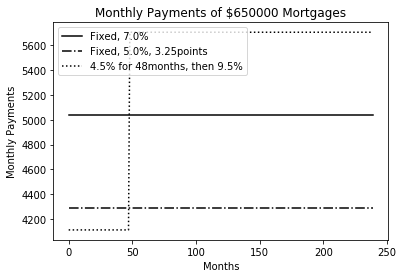

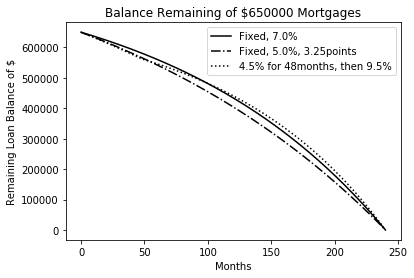

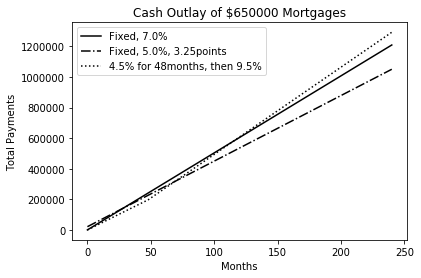

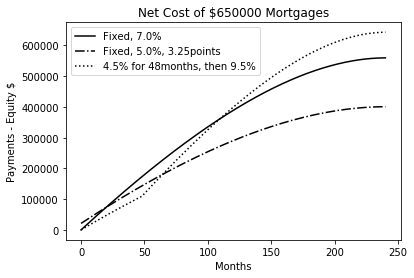

In [81]:
import pylab
compareMortgage(amt=650000, years = 20, fixedRate=0.07, pts = 3.25, ptsRate=0.05, \
                varRate1=0.045, varRate2=0.095, varMonths=48)

## 16. 复杂度

### 16.1 整数转为字符

In [75]:
def intToStr(i):
    digits = '0123456789'
    if i==0:
        return '0'
    result = ''
    while i>0:
        result = digits[i%10] + result
        i = i//10
    return result

In [76]:
intToStr(356)

'356'

### 16.2 归并排序

In [106]:
def merge(left,right,compare):
    result = []
    i = 0
    j = 0
    while i < len(left) and j < len(right):
        if compare(left[i],right[j]):
            result.append(left[i])
            i+=1
        else:
            result.append(right[j])
            j+=1
    while i < len(left):
        result.append(left[i])
        i+=1
        
    while j < len(right):
        result.append(right[j])
        j+=1
        
    return result

def mergeSort(L, compare = lambda x,y:x<y):    
    if len(L)==0 or len(L)==1:
        return L
    else:
        left = mergeSort(L[:len(L)//2], compare) 
        right = mergeSort(L[len(L)//2:], compare)
        return merge(left, right, compare)    

In [107]:
L = [1, 5, 12, 18, 19, 20, 2, 3 ,4 ,7]

In [108]:
mergeSort(L, compare = lambda x,y:x>y)

[20, 19, 18, 12, 7, 5, 4, 3, 2, 1]

## 17. 绘图

### 17.1

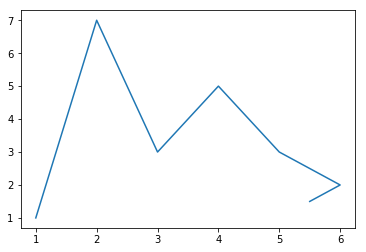

In [11]:
import pylab

pylab.figure(1)
pylab.plot([1,2,3,4,5,6,5.5],[1,7,3,5,3,2,1.5])
pylab.savefig('Figure-Addie')
pylab.show()

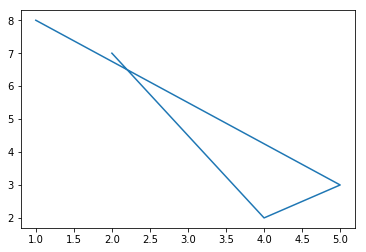

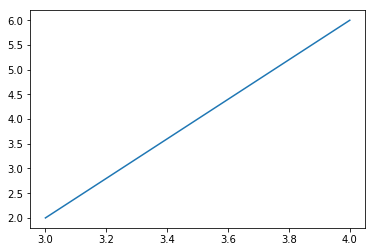

In [13]:
pylab.figure(2)
pylab.plot([2,4,5,1],[7,2,3,8])
pylab.figure(3)
pylab.plot([4,3],[6,2])
pylab.figure(2)
pylab.savefig('Figure-Cindy')
pylab.figure(3)
pylab.savefig('Figure-Sunny')

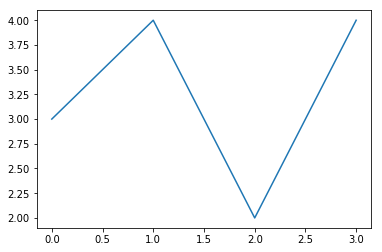

In [16]:
pylab.figure(1)
pylab.plot([3,4,2,4]) # 提供参数为Y值。X值由这个序列计算出来：range(len[3,4,2,4])即range(4)，也就是[0,1,2,3]

Text(0, 0.5, 'Value of Principal($)')

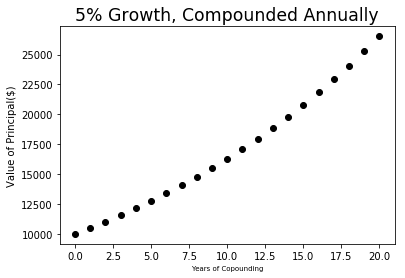

In [42]:
# _*_coding:utf-8_*_

principal = 10000
interestRate = 0.05
years = 20
values = []

for i in range(years + 1):
    values.append(principal)
    principal *= (1+interestRate)
pylab.plot(values, 'ko')
#pylab.plot(values, linewidth = 10)
pylab.title('5% Growth, Compounded Annually', fontsize = 'xx-large')
pylab.xlabel('Years of Copounding', fontsize = 'x-small')
pylab.ylabel('Value of Principal($)')

## 18. 最优化

### 18.1 背包问题

In [24]:
# _*_coding:utf-8_*_

# 定义背包类型：包含物品，物品重量，物品价值
class Item(object):    
    def __init__(self, name, value, weight):
        self.name = name
        self.value = value
        self.weight = weight        
    def getName(self):
        return self.name    
    def getValue(self):
        return self.value    
    def getWeight(self):
        return self.weight    
    def __str__(self):
        result = '<' + self.name + ',' + str(self.value) + ',' + str(self.weight) + '>'
        return result

# 定义keyFucntion，为排序作准备。
def value(item):
    return item.getValue()
def weightInverse(item):
    return 1.0 / item.getWeight()
def density(item):
    return item.getValue()/item.getWeight()

# 定义指定排序下拿物品的规则
def greedy(item, maxWeight, keyFunction):
    itemCopy = sorted(item, key=keyFunction, reverse=True)
    result = []
    totWeight= 0.0
    totValue = 0.0
    for i in itemCopy:
        if i.getWeight() + totWeight <= maxWeight:
            result.append(i)
            totWeight += i.weight
            totValue += i.value
    return result, totValue

# 指定排序下输出背包物品的结果
def testGreedy(items, maxWeight, keyFunction):
    taken, values = greedy(items, maxWeight, keyFunction)
    for i in taken:
        print(i)
    print(values,'\n')

# 批量测试结果
def testGreedys(items, maxWeight):
    print('Use greedy by value to fill knapsack of size ', maxWeight)
    testGreedy(items, maxWeight, value)
    print('Use greedy by weight to fill knapsack of size ', maxWeight)
    testGreedy(items, maxWeight, weightInverse)
    print('Use greedy by density to fill knapsack of size ', maxWeight)
    testGreedy(items, maxWeight, density)

In [25]:
# 给定物品价值表，赋值开始执行
def builtItem():
    names = ['clock', 'paint', 'radio', 'valve', 'book', 'computer']
    values = [175, 90, 20, 50, 10, 200]
    weights = [10, 9, 4, 2, 1, 20]
    items = []
    for i in range(len(names)):
        items.append(Item(names[i], values[i], weights[i]))
    return items

# 执行
testGreedys(builtItem(), 20)

Use greedy by value to fill knapsack of size  20
<computer,200,20>
200.0 

Use greedy by weight to fill knapsack of size  20
<book,10,1>
<valve,50,2>
<radio,20,4>
<paint,90,9>
170.0 

Use greedy by density to fill knapsack of size  20
<valve,50,2>
<clock,175,10>
<book,10,1>
<radio,20,4>
255.0 



#### 穷举最优

In [3]:
#将一个十进制数转为指定位数的二进制。
def getBinaryRep(n, numDigits):
    result = ''
    while n >0:
        result = str(n%2) + result
        n = n//2
    if len(result)>numDigits:
        raise ValueError('not enough digits.')
    else:
        for i in range(numDigits-len(result)):
            result = '0' + result
    return result

getBinaryRep(37,6)

'100101'

In [4]:
#利用转二进制的方法，求子集。所谓子集，就是每一个元素要么在、要么不在的集合。所以每一位上都是0或者1，这样就是一个二进制数串了。
def getSubSet(L):
    powerSet = []
    for i in range(2**len(L)):
        sub = getBinaryRep(i,len(L))
        subSet = []
        for j in range(len(L)):
            if sub[j]=='1':
                subSet.append(L[j])
        powerSet.append(subSet)
    return powerSet

In [19]:
items = builtItem()

# 求出给定背包集中的物品重量列表。
def weights(items):
    knapWeights = []
    for i in range(len(items)):
        knapWeights.append(items[i].weight)
    return knapWeights

# 筛选出符合背包最大承重的重量组合
def maxWeightSet( maxWeight):
    # 物品重量的所有组合方式穷举
    knapSet = getSubSet(weights(items))
    # 筛选不超过最大承重的组合
    maxWeightKnap = []
    for i in knapSet:
        if sum(i)<=maxWeight and sum(i)>0:
            maxWeightKnap.append(i)
    return maxWeightKnap

# 计算这些组合的物品价值
maxWeightKnap = maxWeightSet(20)
for i in maxWeightKnap:
    for j in range(len(i)):
        for k in range(len(items)):
            if i[j]==items[k].weight:
                i[j]=items[k].value
                break #如果不跳出来，4-20-200，这样所有4都会变成200了。

# 提取最大价值物品
value = []
for i in maxWeightKnap:
    value.append(sum(i))
for i in maxWeightKnap:
    if sum(i)==max(value):
        for j in range(len(i)):
            for k in range(len(items)):
                if i[j]==items[k].value:
                    print(items[k].name,':',items[k].value)
        print('Total value is : ', sum(i))

clock : 175
paint : 90
book : 10
Total value is :  275


for循环用得有点多。

下面👇这个是书上写的。感觉是要把对象作为一个整体来思考，而不是各个部分无关的。

In [29]:
def chooseBest(pset, maxWeight, getVal, getWeight):
    bestVal = 0.0
    bestSet = None
    for items in pset:
        itemsVal = 0.0
        itemsWeight = 0.0
        for item in items:
            itemsVal += getVal(item)
            itemsWeight += getWeight(item)
        if itemsWeight<=maxWeight and itemsVal>bestVal:
            bestVal = itemsVal
            bestSet = items
    return (bestSet, bestVal)

In [33]:
pset = getSubSet(items)
bestSet, bestVal = chooseBest(pset, 20, Item.getValue, Item.getWeight)
for i in bestSet:
    print(i)
print('Total value is : ', bestVal)

<clock,175,10>
<paint,90,9>
<book,10,1>
Total value is :  275.0


读到这里感觉备受打击，决定终止这本书的阅读。下次再说。